### 06. 결정 트리
- - -
**결정 트리(Decision tree)** : 분류, 회귀 작업, 다중출력 가능, 매우 복잡한 데이터셋도 학습 가능 >> 랜덤 포레스트의 기본 구성요소

In [1]:
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "img"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] #꽃잎 길이와 너비
y= iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

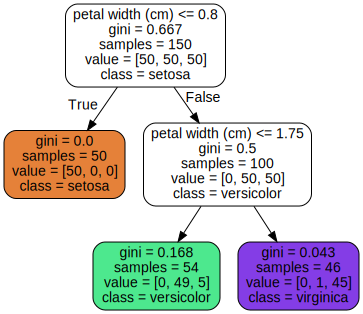

In [3]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

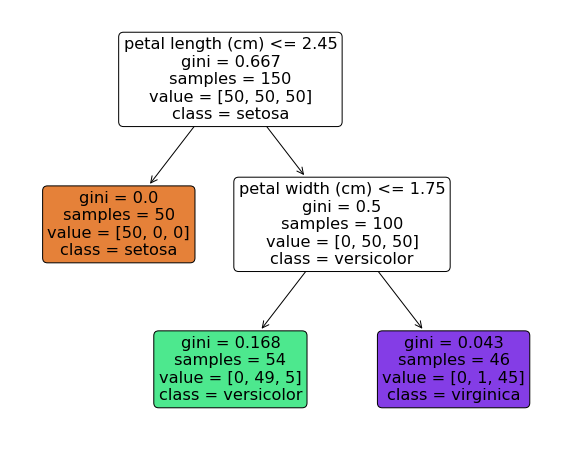

In [3]:
#dot 파일 없이 바로 만들 수 있음
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled = True, rounded=True, feature_names=iris.feature_names[2:],
         class_names = iris.target_names)

plt.show()

### 6.2 예측하기
- 루트노드(Root node) = 깊이가 0인 노드
- 리프노드(leaf node)
- 노드의 Sample 속성 : 적용된 훈련 샘플 수 
- 노드의 value 속성 : 각 클래스의 훈련 샘플 수
- 노드의 gini 속성 : 불순도(Impurity)
$$G_i = 1-\sum_{k=1}^{n}P_{i,k}^2$$
- $P_ik$ =i번째 노드에 있는 훈련 샘플 중 클래스 k에 속한 샘플의 비율

**결정트리**의 장점 : 데이터 전처리 필요 없음(스케일조정/표준화 과정 불필요)


**모델 해석**
- 화이트박스 모델 : 직관적이고 결정방식을 이해하기 쉬움 = 알고리즘이 분류한 기준에 대해 이해하기 쉬움(결정 트리)
- 블랙박스 모델 : 성능이 좋고 예측 만드는 연산 과정을 쉽게 이해 but 예측에 대한 기준을 알기 어려움(랜덤포레스트, 신경망)

### 6.3 클래스 확률 추정
한 샘플이 특정 클래스 k에 속할 확률 추정 가능

In [4]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [5]:
tree_clf.predict([[5, 1.5]])

array([1])

### 6.4 CART 훈련 알고리즘
결정트리 훈련(=트리 성장)을 위해 CART 알고리즘 사용 >> 사이킷런도 이진 트리만 만드는 CART 알고리즘 사용<br>
- 사이킷런 = 이진 트리 CART 알고리즘 = 리프 노드 외의 모든 노드는 2개의 자식 노드를 가짐
- ID3 같은 알고리즘은 2 이상의 자식 노드를 가진 트리를 만들 수 있음)
<br>
- CART 비용 함수<br>
$$J(k,t_k) = \frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right}$$<br>
- $G_{left/right}$ : 왼쪽/오른쪽 서브셋의 불순도
- $m_{left/right}$ : 왼쪽/오른쪽 서브셋의 샘플 수

**탐욕적 알고리즘(Greedy algorithm)**<br>
(예) CART 알고리즘<br>
맨 위 루트노드에서 최적의 분할을 찾으며 이어지는 각 단계에서 이 과정을 반복<br>
단, 현재 단계의 분할이 몇 단계를 거쳐 가장 낮은 불순도로 이어질 수 있을지 없을지는 고려하지 않음 >> 최적의 솔루션이라고 보장못함<br>
최적의 트를 찾는 것 = NP-완전(NP-Complete)문제 >> 시간 많이 필요, 매우 작은 훈련세트에 적용하기 어려움

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

In [ ]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower

In [ ]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

In [ ]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()